In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set(style="whitegrid")

In [2]:
import os
os.getcwd()

'/Users/jillmaisel/Applications/Job-insights'

In [12]:
# Add 'Year' column to each
df_2022['Year'] = 2022
df_2023['Year'] = 2023
df_2024['Year'] = 2024

In [13]:
# Combine all into one DataFrame
combined_df = pd.concat([df_2022, df_2023, df_2024], ignore_index=True)

# Clean up column names (strip spaces, etc.)
combined_df.columns = combined_df.columns.str.strip()

# Select relevant columns and rename
final_df = combined_df[['Year', 'OCC_TITLE', 'AREA_TITLE', 'TOT_EMP', 'A_MEAN']].copy()
final_df.columns = ['Year', 'Job Title', 'MetroArea', 'Total Employed', 'MeanSalary']

# Clean job title strings
final_df['Job Title'] = final_df['Job Title'].str.strip()

In [28]:
# Clean and convert to numeric
final_df['Total Employed'] = pd.to_numeric(final_df['Total Employed'], errors='coerce')
final_df['MeanSalary'] = pd.to_numeric(final_df['MeanSalary'], errors='coerce')
final_df = final_df[~final_df['Job Title'].str.contains('occupations', case=False, na=False)]

In [29]:
# Step 1: Get top 10 job titles by total employment in 2024
top_jobs_2024 = (
    final_df[final_df['Year'] == 2024]
    .groupby('Job Title')['Total Employed']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)


In [30]:
# Step 2: Filter the full dataset to only include these job titles across all years
top_jobs_df = final_df[final_df['Job Title'].isin(top_jobs_2024)]

In [31]:
# Step 3: Pivot tables to view data
employment_pivot = top_jobs_df.pivot_table(
    index='Job Title', columns='Year', values='Total Employed', aggfunc='sum'
)
salary_pivot = top_jobs_df.pivot_table(
    index='Job Title', columns='Year', values='MeanSalary', aggfunc='mean'
)

In [32]:
# Step 4: Display tables
print("📊 Total Employed (2022–2024):")
display(employment_pivot)

print("💵 Mean Salary (2022–2024):")
display(salary_pivot)

📊 Total Employed (2022–2024):


Year,2022,2023,2024
Job Title,,,
Cashiers,2802020.0,2799570.0,2622000.0
Customer Service Representatives,2510780.0,2460580.0,2282430.0
Fast Food and Counter Workers,2946380.0,3254650.0,3272980.0
General and Operations Managers,2863600.0,2948950.0,2967640.0
Home Health and Personal Care Aides,3134710.0,3310220.0,3545390.0
"Laborers and Freight, Stock, and Material Movers, Hand",2516350.0,2605210.0,2559100.0
"Office Clerks, General",2141270.0,2119430.0,2098000.0
Registered Nurses,2730280.0,2814940.0,2873620.0
Retail Salespersons,3220120.0,3254220.0,3289820.0


💵 Mean Salary (2022–2024):


Year,2022,2023,2024
Job Title,,,
Cashiers,27449.671717,29351.212121,30290.310881
Customer Service Representatives,38515.974684,40764.520202,42727.202073
Fast Food and Counter Workers,26452.253165,28602.676768,29671.968912
General and Operations Managers,109721.670886,115178.625954,117091.740260
Home Health and Personal Care Aides,28776.944444,31156.455696,32713.723958
"Laborers and Freight, Stock, and Material Movers, Hand",35914.835443,38011.898734,39759.402597
"Office Clerks, General",38536.868687,40725.707071,42609.895833
Registered Nurses,81152.416452,86876.675258,90824.221636
Retail Salespersons,33161.338384,35050.353535,35497.642487


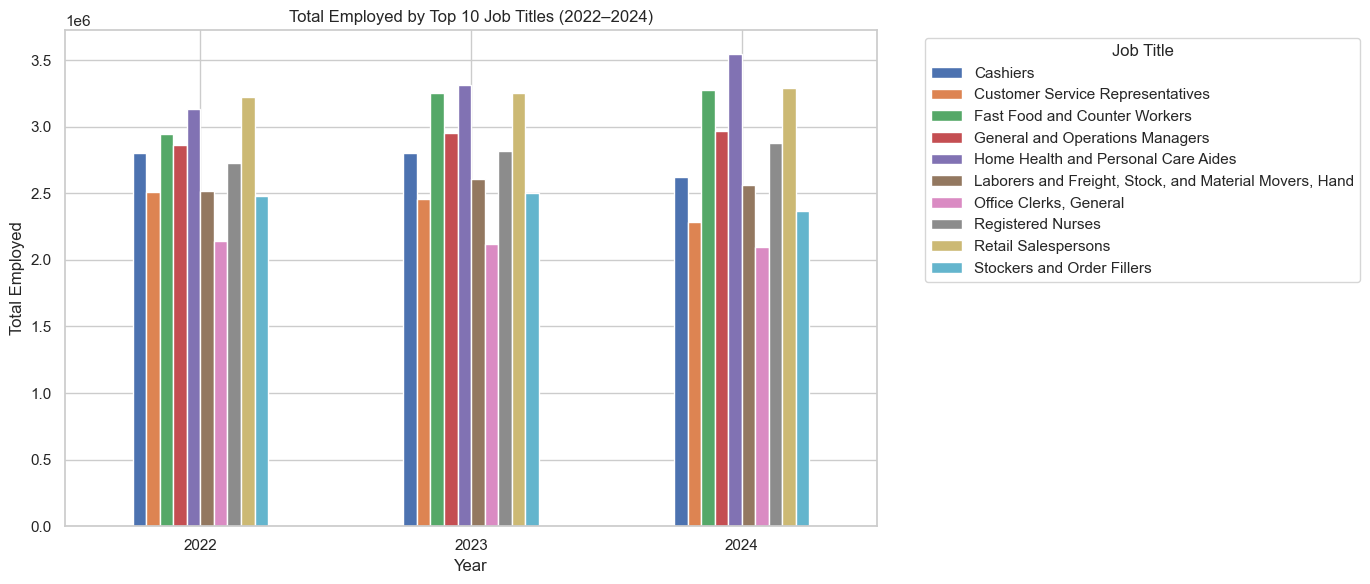

In [33]:
# Step 5: Plot Total Employed Trends
employment_pivot.T.plot(kind='bar', figsize=(14, 6))
plt.title("Total Employed by Top 10 Job Titles (2022–2024)")
plt.ylabel("Total Employed")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

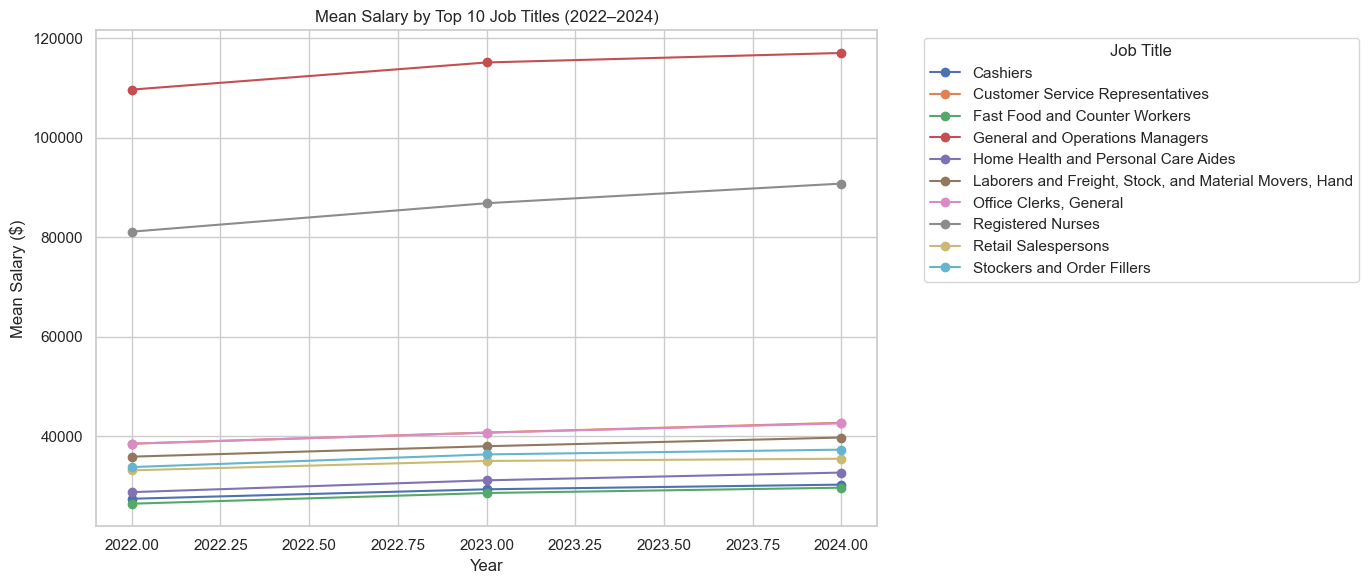

In [34]:
salary_pivot.T.plot(kind='line', marker='o', figsize=(14, 6))
plt.title("Mean Salary by Top 10 Job Titles (2022–2024)")
plt.ylabel("Mean Salary ($)")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [35]:
# Pivot Total Employed by Year and Job Title
employment_pivot = final_df.pivot_table(
    index='Job Title',
    columns='Year',
    values='Total Employed',
    aggfunc='sum'
)

# Pivot Mean Salary by Year and Job Title
salary_pivot = final_df.pivot_table(
    index='Job Title',
    columns='Year',
    values='MeanSalary',
    aggfunc='mean'
)

In [36]:
# Only keep rows where both years are present
employment_growth = employment_pivot[[2022, 2024]].dropna()
salary_growth = salary_pivot[[2022, 2024]].dropna()

# Compute growth (absolute change)
employment_growth['Growth'] = employment_growth[2024] - employment_growth[2022]
salary_growth['Growth'] = salary_growth[2024] - salary_growth[2022]

In [37]:
# Top 10 by employed growth
top_10_employment_growth = employment_growth.sort_values(by='Growth', ascending=False).head(10)

# Top 10 by salary growth
top_10_salary_growth = salary_growth.sort_values(by='Growth', ascending=False).head(10)


In [38]:
# Add growth as a column in final display
employment_table = top_10_employment_growth[[2022, 2024, 'Growth']].rename(
    columns={2022: '2022 Employed', 2024: '2024 Employed'}
)

salary_table = top_10_salary_growth[[2022, 2024, 'Growth']].rename(
    columns={2022: '2022 Salary', 2024: '2024 Salary'}
)


/var/folders/_m/flzbd_rd3y3609rq2skhdz180000gn/T/ipykernel_42393/3590202167.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


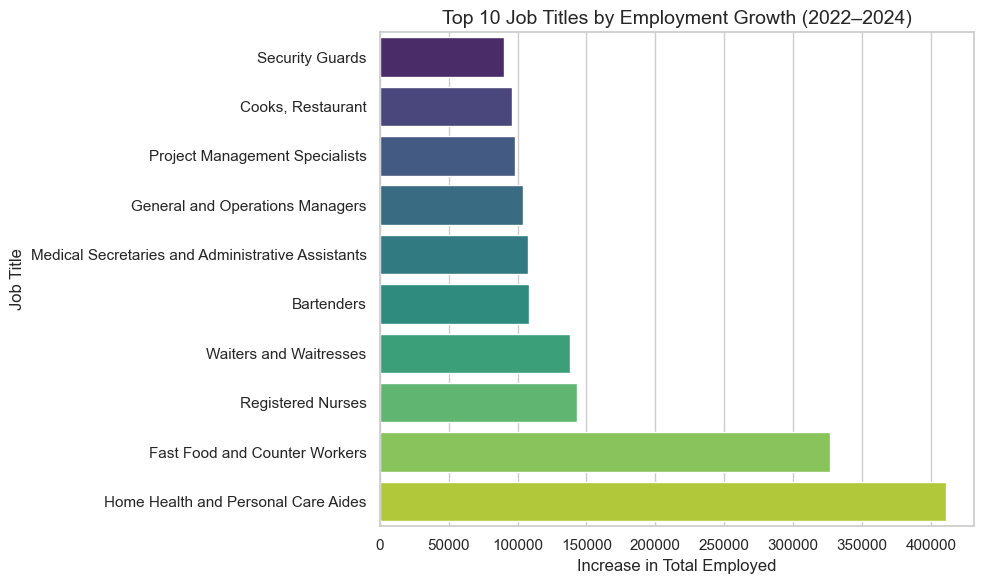

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Sort again just in case
employment_table_sorted = employment_table.sort_values(by='Growth', ascending=True)

# Plot
sns.barplot(
    x='Growth',
    y=employment_table_sorted.index,
    data=employment_table_sorted,
    palette='viridis'
)

plt.title('Top 10 Job Titles by Employment Growth (2022–2024)', fontsize=14)
plt.xlabel('Increase in Total Employed')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()


/var/folders/_m/flzbd_rd3y3609rq2skhdz180000gn/T/ipykernel_42393/3605430616.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


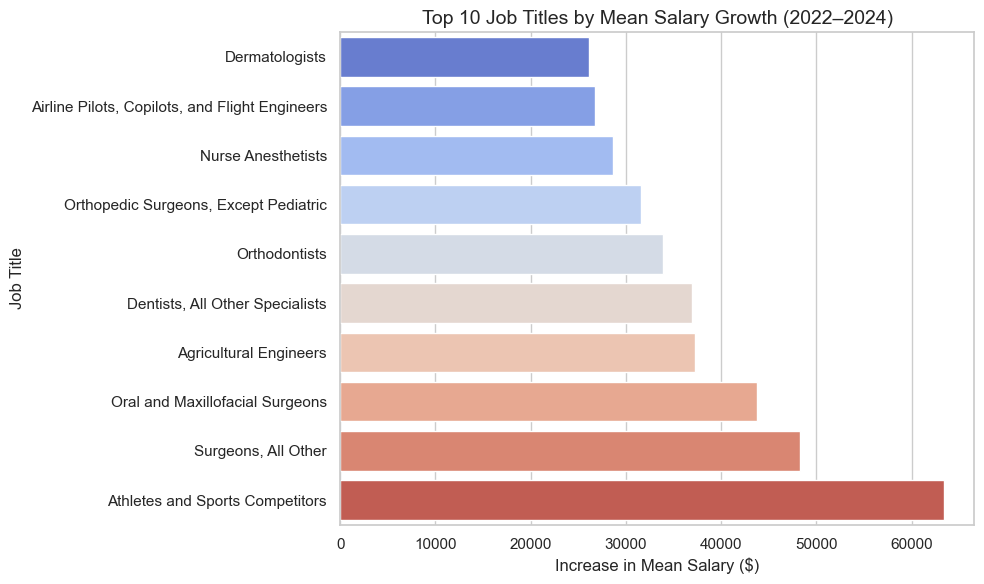

In [40]:
plt.figure(figsize=(10, 6))

salary_table_sorted = salary_table.sort_values(by='Growth', ascending=True)

sns.barplot(
    x='Growth',
    y=salary_table_sorted.index,
    data=salary_table_sorted,
    palette='coolwarm'
)

plt.title('Top 10 Job Titles by Mean Salary Growth (2022–2024)', fontsize=14)
plt.xlabel('Increase in Mean Salary ($)')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()


In [41]:
# Get job titles from the previous employment growth calculation
top_growth_jobs_emp = employment_table.index.tolist()

# Filter original data
emp_pivot = (
    final_df[final_df['Job Title'].isin(top_growth_jobs_emp)]
    .groupby(['Job Title', 'Year'])['Total Employed']
    .sum()
    .reset_index()
    .pivot(index='Job Title', columns='Year', values='Total Employed')
)

emp_pivot['Growth'] = emp_pivot[2024] - emp_pivot[2022]
emp_pivot = emp_pivot.sort_values(by='Growth', ascending=False)
emp_pivot


Year,2022,2023,2024,Growth
Job Title,,,,
Home Health and Personal Care Aides,3134710.0,3310220.0,3545390.0,410680.0
Fast Food and Counter Workers,2946380.0,3254650.0,3272980.0,326600.0
Registered Nurses,2730280.0,2814940.0,2873620.0,143340.0
Waiters and Waitresses,1898580.0,2010620.0,2036290.0,137710.0
Bartenders,529410.0,621410.0,637730.0,108320.0
Medical Secretaries and Administrative Assistants,616390.0,670330.0,723750.0,107360.0
General and Operations Managers,2863600.0,2948950.0,2967640.0,104040.0
Project Management Specialists,757510.0,839780.0,855800.0,98290.0
"Cooks, Restaurant",1173370.0,1256840.0,1269520.0,96150.0


In [42]:
# Get job titles from the previous salary growth calculation
top_growth_jobs_salary = salary_table.index.tolist()

# Filter original data
salary_pivot = (
    final_df[final_df['Job Title'].isin(top_growth_jobs_salary)]
    .groupby(['Job Title', 'Year'])['MeanSalary']
    .mean()
    .reset_index()
    .pivot(index='Job Title', columns='Year', values='MeanSalary')
)

salary_pivot['Growth'] = salary_pivot[2024] - salary_pivot[2022]
salary_pivot = salary_pivot.sort_values(by='Growth', ascending=False)
salary_pivot


Year,2022,2023,2024,Growth
Job Title,,,,
Athletes and Sports Competitors,106862.000000,279165.625000,170252.000000,63390.000000
"Surgeons, All Other",335484.500000,346749.565217,383800.714286,48316.214286
Oral and Maxillofacial Surgeons,261210.000000,352345.000000,305016.666667,43806.666667
Agricultural Engineers,40030.000000,82386.666667,77240.000000,37210.000000
"Dentists, All Other Specialists",182242.727273,213252.857143,219148.750000,36906.022727
Orthodontists,219352.500000,222842.500000,253262.500000,33910.000000
"Orthopedic Surgeons, Except Pediatric",321653.142857,364962.758621,353286.538462,31633.395604
Nurse Anesthetists,200507.964602,216530.092593,229106.666667,28598.702065
"Airline Pilots, Copilots, and Flight Engineers",190320.500000,204753.500000,217104.444444,26783.944444


In [43]:
# Step 1: Get top 10 job titles by MeanSalary in 2024
top_salary_jobs_2024 = (
    final_df[final_df['Year'] == 2024]
    .sort_values(by='MeanSalary', ascending=False)
    .dropna(subset=['MeanSalary'])
    .head(10)['Job Title']
    .unique()
)

# Step 2: Filter the dataset for these top job titles across all years
salary_top_jobs_df = final_df[final_df['Job Title'].isin(top_salary_jobs_2024)]

# Step 3: Create a pivot table with Job Titles as rows, Years as columns, and MeanSalary as values
pivot_salary = salary_top_jobs_df.pivot_table(
    index='Job Title',
    columns='Year',
    values='MeanSalary'
).reset_index()

# Optional: Sort the pivot by 2024 salary descending
pivot_salary = pivot_salary.sort_values(by=2024, ascending=False)

pivot_salary


Year,Job Title,2022,2023,2024
1,Cardiologists,400090.769231,429015.714286,410583.181818
5,"Surgeons, All Other",335484.500000,346749.565217,383800.714286
3,"Orthopedic Surgeons, Except Pediatric",321653.142857,364962.758621,353286.538462
4,Radiologists,346176.944444,318343.030303,352496.129032
2,Chief Executives,225103.377926,234330.716511,243146.539683
0,Athletes and Sports Competitors,106862.000000,279165.625000,170252.000000
